<a href="https://colab.research.google.com/github/patlfer0078/Hertz_Indentation/blob/main/HertzModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

Indentation Tip info:


*   Indentation Type - Spherical
*   Indentation Radius - 2.5 micrometers
*   Poisson Ratio of Hydrogel = 0.5



In [2]:
#initialize paramters
R = 2.5E-6 # radius converted from um to m
v_hydro = 0.5

In [3]:
# Load data
filepath = "Prb3Data.xlsx"
data = pd.read_excel(filepath)
df = pd.DataFrame(data)

df.head(10)

,Disp_28 (nm),Load_28 (nN),Disp_0 (nm),Load_0 (nN)
0,0.000000,0.000000,0.000000,0.000000
1,39.156627,0.002283,65.868263,0.001354
2,90.361446,0.004566,137.724551,0.002273
3,132.530120,0.018265,218.562874,0.004545
4,189.759036,0.047945,308.383234,0.013636
5,222.891566,0.063927,389.221557,0.018182
6,265.060241,0.091324,482.035928,0.034091
7,295.180723,0.118721,562.874251,0.040909
8,331.325301,0.150685,652.694611,0.054545
9,352.409639,0.171233,745.508982,0.072727


In [4]:
#Unit conversion of dataframe
df = df.copy() * 1E-9 # from nm & nN to m & N
df.head(10)

,Disp_28 (nm),Load_28 (nN),Disp_0 (nm),Load_0 (nN)
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,3.915663e-08,2.283105e-12,6.586826e-08,1.354000e-12
2,9.036145e-08,4.566210e-12,1.377246e-07,2.272727e-12
3,1.325301e-07,1.826484e-11,2.185629e-07,4.545455e-12
4,1.897590e-07,4.794521e-11,3.083832e-07,1.363636e-11
5,2.228916e-07,6.392694e-11,3.892216e-07,1.818182e-11
6,2.650602e-07,9.132420e-11,4.820359e-07,3.409091e-11
7,2.951807e-07,1.187215e-10,5.628743e-07,4.090909e-11
8,3.313253e-07,1.506849e-10,6.526946e-07,5.454545e-11
9,3.524096e-07,1.712329e-10,7.455090e-07,7.272727e-11


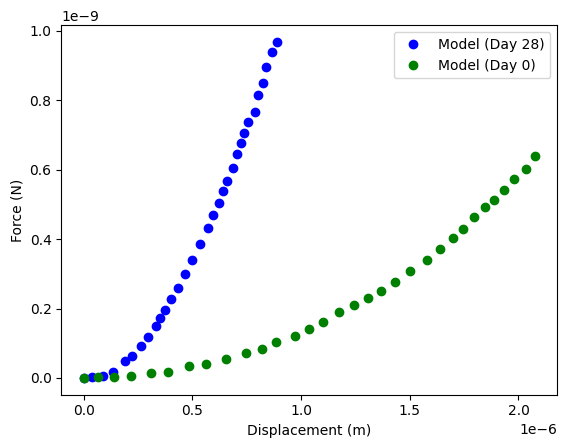

In [5]:
# Plot raw data
plt.plot(df.iloc[:, 0], df.iloc[:, 1], 'bo')
plt.plot(df.iloc[:, 2], df.iloc[:, 3], 'go')
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.legend(['Model (Day 28)', 'Model (Day 0)'])
plt.show()

In [6]:
# Residual function
def fit_hertz_model(d, F, R, initial_guess=100, bounds=(0, np.inf)):
    """
    Fit Hertz contact model to force-displacement data.

    Parameters:
    - d: array-like, displacement data
    - F: array-like, force data
    - R: indenter radius (float number)
    - initial_guess: initial guess for elastic modulus (float number)
    - bounds: tuple, bounds for the optimization

    Returns:
    - Er: fitted elastic modulus (float)
    - resnorm: cost function value (float)
    - Ffit: array, fitted force values
    """

    # Residual function
    def resF(Er):
        return (F - (4 * np.sqrt(R) / 3) * Er * d ** (3 / 2)) / np.mean(F)

    # Least square method
    result = least_squares(resF, initial_guess, bounds=bounds)

    # Extract fitted parameters
    Er = result.x[0]
    resnorm = result.cost

    # Fitted force values
    Ffit = (4 * np.sqrt(R) / 3) * Er * d ** (3 / 2)

    return Er, resnorm, Ffit


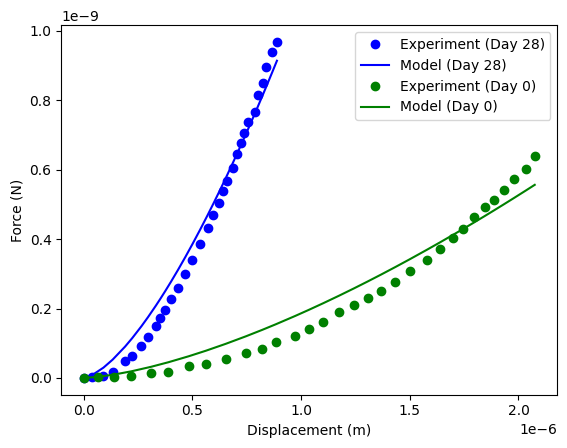

In [7]:
# Fit Hertz model
Er1, resnorm1, Ffit1 = fit_hertz_model(df.iloc[:, 0], df.iloc[:, 1], R) #Day 28
Er2, resnorm2, Ffit2 = fit_hertz_model(df.iloc[:, 2], df.iloc[:, 3], R) #Day 0

# Plot raw data and fit
plt.plot(df.iloc[:, 0], df.iloc[:, 1], 'bo', df.iloc[:, 0], Ffit1, 'b-')
plt.plot(df.iloc[:, 2], df.iloc[:, 3], 'go', df.iloc[:, 2], Ffit2, 'g-')
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.legend(['Experiment (Day 28)', 'Model (Day 28)', 'Experiment (Day 0)', 'Model (Day 0)'])
plt.show()

In [8]:
"""
Here we do the calculations for the (apparent) elastic modulus based on the formula:
e = (1 - v^2) * Er (Pascals)
"""
# Elastic modulus
def modulus(Er, v):
  return (1 - v**2) * Er



In [9]:
E1 = modulus(Er1, v_hydro) # Day 28
E2 = modulus(Er2, v_hydro) # Day 0

print(f'Elastic Modulus (Day 28): {E1} Pa')
print(f'Elastic Modulus (Day 0): {E2} Pa')

Elastic Modulus (Day 28): 388.12836706744065 Pa
Elastic Modulus (Day 0): 66.22054438236457 Pa
